In [ ]:
#Data preprocessing
#importing the libraries
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
#Importing the training set
dataset_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning/Google_Stock_Price_Train.csv')

In [ ]:
training_set=dataset_train.iloc[:,1:2].values

In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))

In [ ]:
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
#creating a data structure with 60 timesteps and 1 output
x_train=[]

In [ ]:
y_train=[]

In [ ]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#Reshaping 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Building the RNN
#Importing the keras libraries and packages
from keras.models import Sequential

In [ ]:
from keras.layers.core import Dense
#from keras.layers import Dense(no working)

In [ ]:
from keras.layers import LSTM

In [ ]:
from keras.layers import Dropout

In [ ]:
#Initialising the RNN
regressor=Sequential()

In [ ]:
##Addind the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
##Addind the second LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
##Addind the third LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
##Addind the fourth LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
#Adding the output layer
regressor.add(Dense(units=1))

In [ ]:
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#fitting the RNN to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 28s 113ms/step - loss: 0.0689
Epoch 2/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0079
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0058
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0038
Epoch 13/100

In [ ]:
#making the predictions and visualising the results
#getting the real stock price
dataset_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_learning/Google_Stock_Price_Test.csv')

In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
#getting the predicted stock price
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [ ]:
inputs=inputs.reshape(-1,1)

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
x_test=[]

In [ ]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)


In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(x_test)

In [ ]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

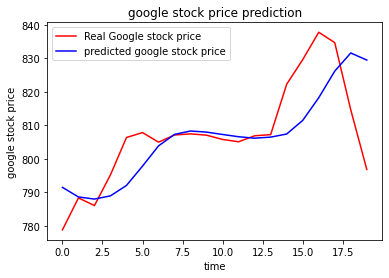

In [ ]:
#visualising the results
plt.plot(real_stock_price,color='red',label='Real Google stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()

In [ ]:
plt.plot(predicted_stock_price,color='blue',label='predicted google stock price')

In [ ]:
plt.title('google stock price prediction')

In [ ]:
plt.xlabel('time')

In [ ]:
plt.ylabel('google stock price')

In [ ]:
plt.legend()

In [ ]:
plt.show()